In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("D:\ML Data Sets\spam_ham_dataset.csv")
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\dhruv joshi\AppData\Local\Temp\ipykernel_14760\2925304537.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\ML Data Sets\spam_ham_dataset.csv")


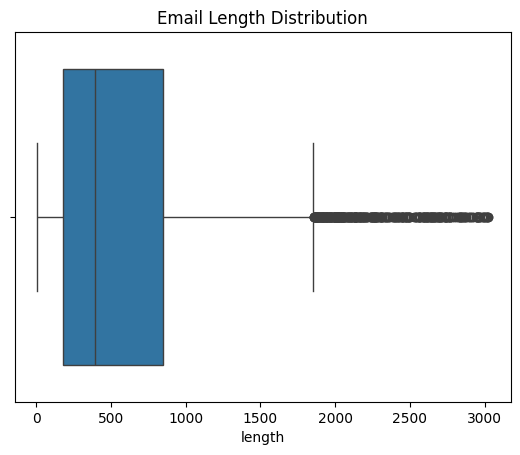

In [ ]:
df['clean_message'] = df['text'].apply(clean_text)

# Remove emails with extremely long lengths
df['length'] = df['clean_message'].apply(len)
sns.boxplot(x=df['length'])
plt.title("Email Length Distribution")
plt.show()
max_len = df['length'].quantile(0.95)
df = df[df['length'] < max_len]

In [21]:
# Encode labels directly (spam = 1, ham = 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label_num'], test_size=0.2, random_state=42
)


In [22]:
# Vectorize text
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [23]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}


In [24]:
results = {}
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc



Naive Bayes Accuracy: 0.9246
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       742
           1       1.00      0.74      0.85       293

    accuracy                           0.92      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.92      0.92      1035


Logistic Regression Accuracy: 0.9903
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035


Decision Tree Accuracy: 0.9565
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       742
           1       0.91      0.94      0.92       293

    accuracy                           0.96      1035
   macro avg       0.94     

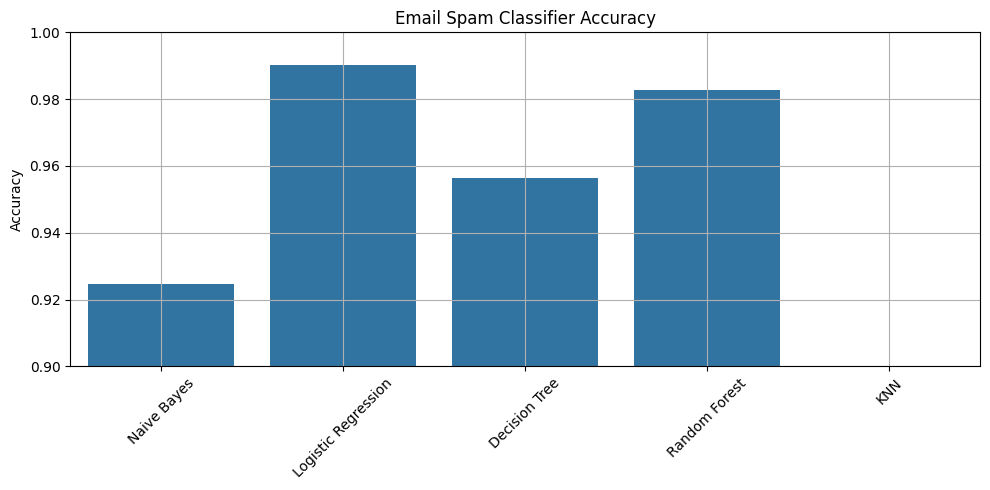

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Email Spam Classifier Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,NaN,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,NaN,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,NaN,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,NaN,"Subject: photoshop , windows , office . cheap ...",1
4,2030,NaN,Subject: re : indian springs\r\nthis deal is t...,0
